In [1]:
from fenics import *
from dolfin import *
from mshr import *

In [28]:
# create Mesh
domain1 = Circle(Point(0, 0), 0.25)
domain2 = Circle(Point(0, 0), 1)
domain = domain2 - domain1
mesh = generate_mesh(domain, 30)

epsilon_0 = 1
epsilon_e = 10
X = FunctionSpace(mesh, 'P', 1)

In [31]:
# Define boundry condition
#V_D = Expression('0.5 + x[0]',degree=1)
r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
u_init = Expression("r*r*(2-r)*sin(t/2)*sin(t/2)*cos(t/2)*cos(r*r*r)",r=r,t=theta, degree=1)

def boundry(x, on_boundry):
    return on_boundry

bc = DirichletBC(X, V_D, boundry)

In [32]:
# Define variational proble
V = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V), grad(v))*dx
L = rho*v*dx

In [33]:
# Compute solution
V = Function(X)
solve(a == L, V, bc)

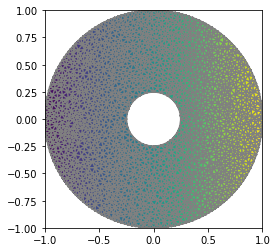

In [34]:
# Plot solution and mesh
plot(V)
plot(mesh)